In [92]:
# Import necessary libraries
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [104]:
# Load data
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

# Check the dataset size
print("Training data size:", xtrain.shape)
print("Test data size:", xtest.shape)


Training data size: (60000, 28, 28)
Test data size: (10000, 28, 28)


Image Label : 9


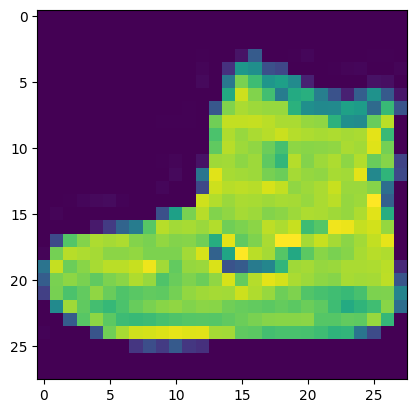

In [105]:
print("Image Label :",ytrain[0])
plt.imshow(xtrain[0])

In [106]:
# Data preprocessing
xtrain = xtrain / 255
xtest = xtest / 255

In [108]:
# Buil cnn model
cnn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [109]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7874 - loss: 0.5857 - val_accuracy: 0.8834 - val_loss: 0.3289
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8902 - loss: 0.3003 - val_accuracy: 0.8693 - val_loss: 0.3313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9118 - loss: 0.2413 - val_accuracy: 0.9025 - val_loss: 0.2656
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9249 - loss: 0.1997 - val_accuracy: 0.9043 - val_loss: 0.2603
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9365 - loss: 0.1713 - val_accuracy: 0.9124 - val_loss: 0.2444
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9442 - loss: 0.1491 - val_accuracy: 0.9065 - val_loss: 0.2738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9526 - loss: 0.1250 - val_accuracy: 0.9159 - val_loss: 0.2712
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9611 -

In [111]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(xtest, ytest)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9072 - loss: 0.3159
Test accuracy: 91.11%


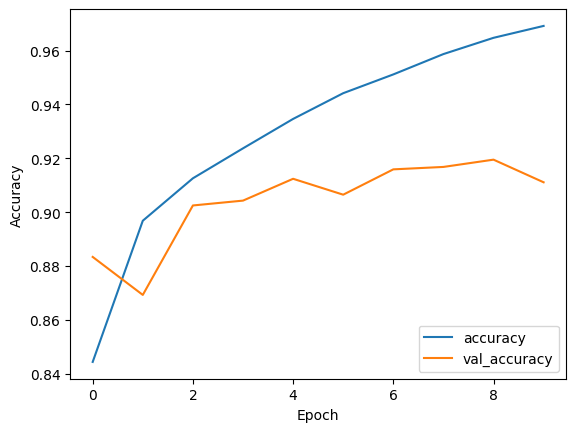

In [112]:
# Accuracy graphs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

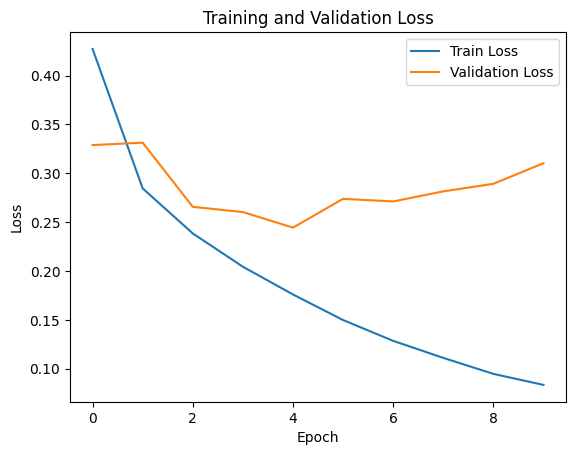

In [113]:
# Loss graphs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


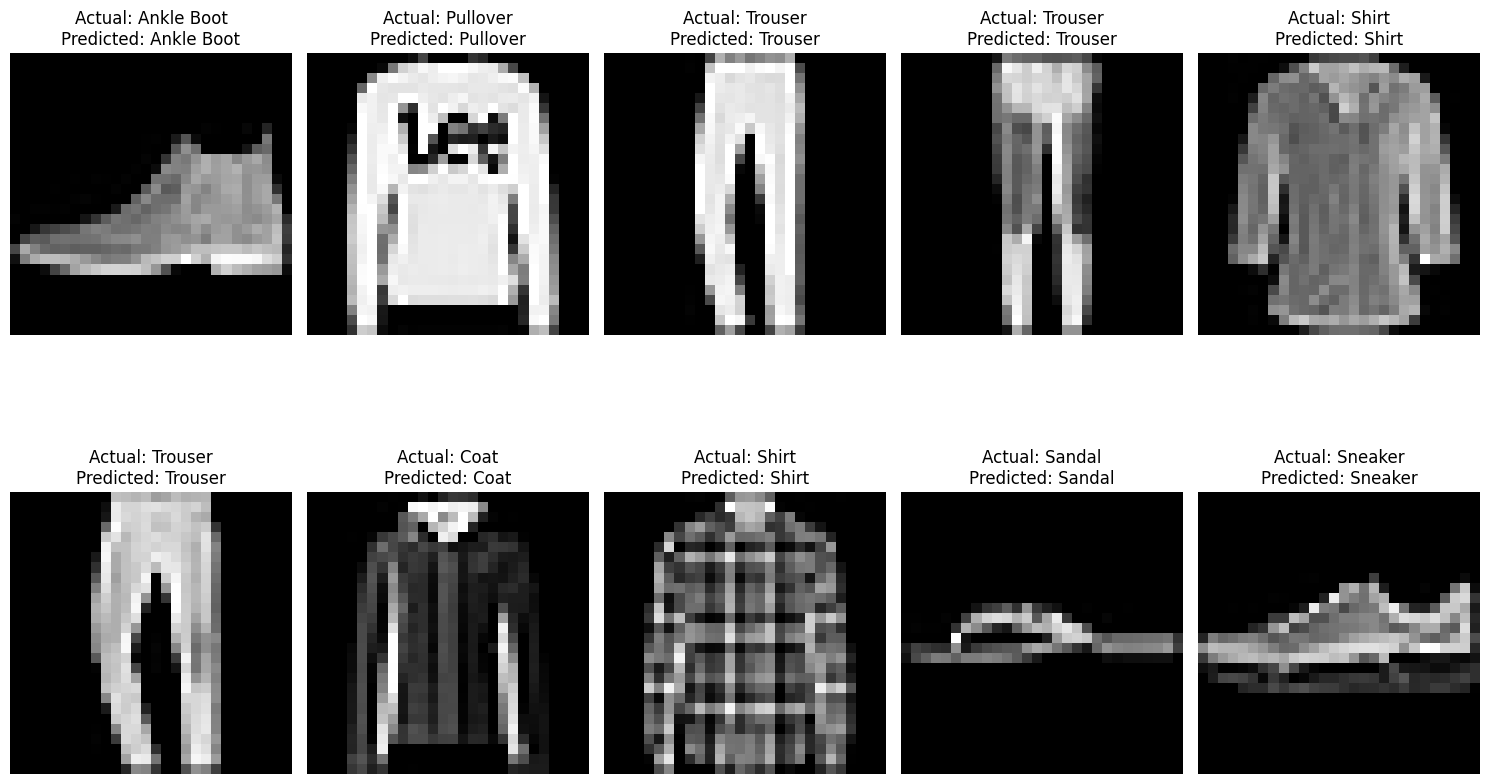

In [117]:
# Label names
label_names = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Example of using label_names after model prediction
predictions = cnn_model.predict(xtest)
predicted_labels = np.argmax(predictions, axis=1)

# Print some predictions with images
num_images = 10  # Adjust as needed
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(xtest[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {label_names[ytest[i]]}\nPredicted: {label_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
